

# Calculation and Plotting of Gini Coefficient



                                              address       balance  \
1   dea80a1c63c56f21beb18bae761b80d33fc0ad08ada018...  2.764507e+11   
9   8ce2430b39c7a9e77e10ecd100da5fbf4549dfc55201df...  4.945000e+08   
16  b1cd46b98ec8501da1a85aa9ce9c9a52e17e672b6b1811...  1.041795e+08   
18  dafcc4f6e813771d995ab61d4afa8777d18f8438922297...  4.501457e+09   
20  4132b0005724e0bd2e23410afa5ae66c8ccc34c73a2448...  2.000000e+06   

             timestamp  
1  2022-04-28 15:59:55  
9  2022-04-28 15:59:55  
16 2022-04-28 15:59:55  
18 2022-04-28 15:59:55  
20 2022-04-28 15:59:55  
Monthly Gini Coefficients:
      month   balance
0   2021-04  0.914311
1   2021-05  0.891115
2   2021-06  0.891617
3   2021-07  0.885223
4   2021-08  0.941684
5   2021-09  0.918174
6   2021-10  0.952455
7   2021-11  0.937689
8   2021-12  0.958689
9   2022-01  0.998767
10  2022-02  0.952899
11  2022-03  0.966039
12  2022-04  0.963064


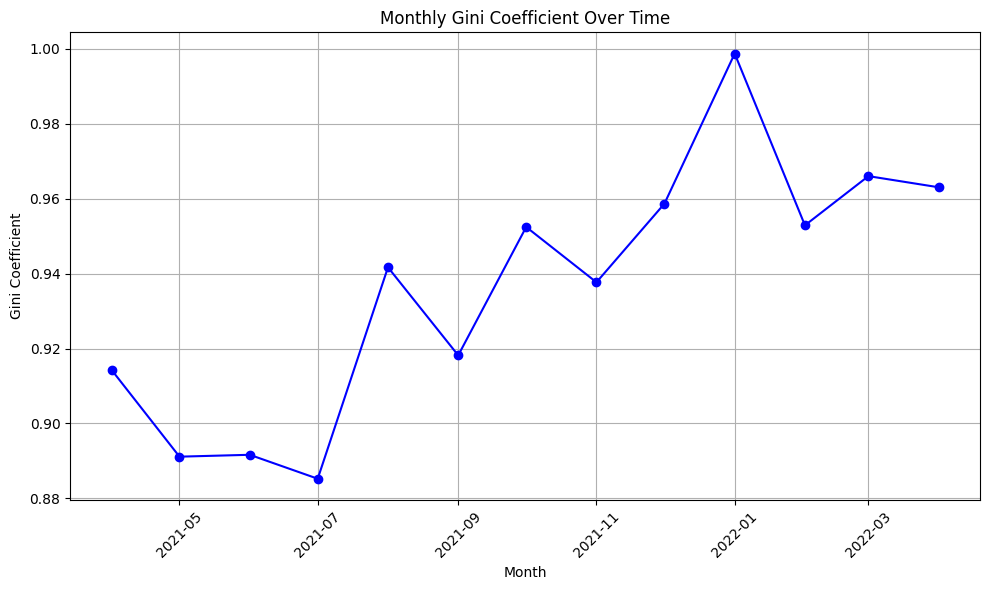

In [20]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Step 1. Loading Dataset

# Load the dataset
file_path = 'IOTA_1year_tx_data2.csv'
df = pd.read_csv(file_path)

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 2. Calculation 

# Function to safely parse the strings
def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []

# Function to calculate the Gini Coefficient
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))
    return gini

# Function to calculate the Nakamoto Coefficient
def nakamoto_coefficient(balances, threshold=0.5):
    sorted_balances = np.sort(balances)[::-1]  # Sort in descending order
    cumulative_share = np.cumsum(sorted_balances) / np.sum(sorted_balances)
    return np.searchsorted(cumulative_share, threshold) + 1

# Prepare Data: Calculate net balances for each address
def calculate_net_balances(transactions):
    address_balances = {}
    
    for _, tx in transactions.iterrows():
        input_addresses = safe_literal_eval(tx['input_addresses_x'])
        output_addresses = safe_literal_eval(tx['output_addresses_y'])
        input_amounts = safe_literal_eval(tx['input_amounts_x'])
        output_amounts = safe_literal_eval(tx['output_amounts_y'])

        for addr, amount in zip(input_addresses, input_amounts):
            if addr in address_balances:
                address_balances[addr] -= amount
            else:
                address_balances[addr] = -amount

        for addr, amount in zip(output_addresses, output_amounts):
            if addr in address_balances:
                address_balances[addr] += amount
            else:
                address_balances[addr] = amount

    return address_balances

address_balances = calculate_net_balances(df)

# Convert the address balances to a DataFrame
balances_df = pd.DataFrame(list(address_balances.items()), columns=['address', 'balance'])
balances_df = balances_df[balances_df['balance'] > 0]  # Filter out addresses with zero or negative balance

# Add a timestamp column based on the transaction data
balances_df['timestamp'] = pd.to_datetime(df['timestamp'].max())

# Display a preview of the balances DataFrame to ensure correctness
print(balances_df.head())

# Step 3. Calculate Monthly Gini Coefficient

# Group the data by month and calculate the Gini Coefficient for each month
balances_df['month'] = df['timestamp'].dt.to_period('M')
monthly_gini = balances_df.groupby('month')['balance'].apply(gini_coefficient).reset_index()

# Display the calculated Gini Coefficients for each month
print("Monthly Gini Coefficients:")
print(monthly_gini)

# Step 4. Plot the Monthly Gini Coefficient

# Plot the Gini Coefficient over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_gini['month'].dt.to_timestamp(), monthly_gini['balance'], marker='o', linestyle='-', color='b')
plt.title("Monthly Gini Coefficient Over Time")
plt.xlabel("Month")
plt.ylabel("Gini Coefficient")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#  Calculation and Plotting of Nakamoto Coefficient



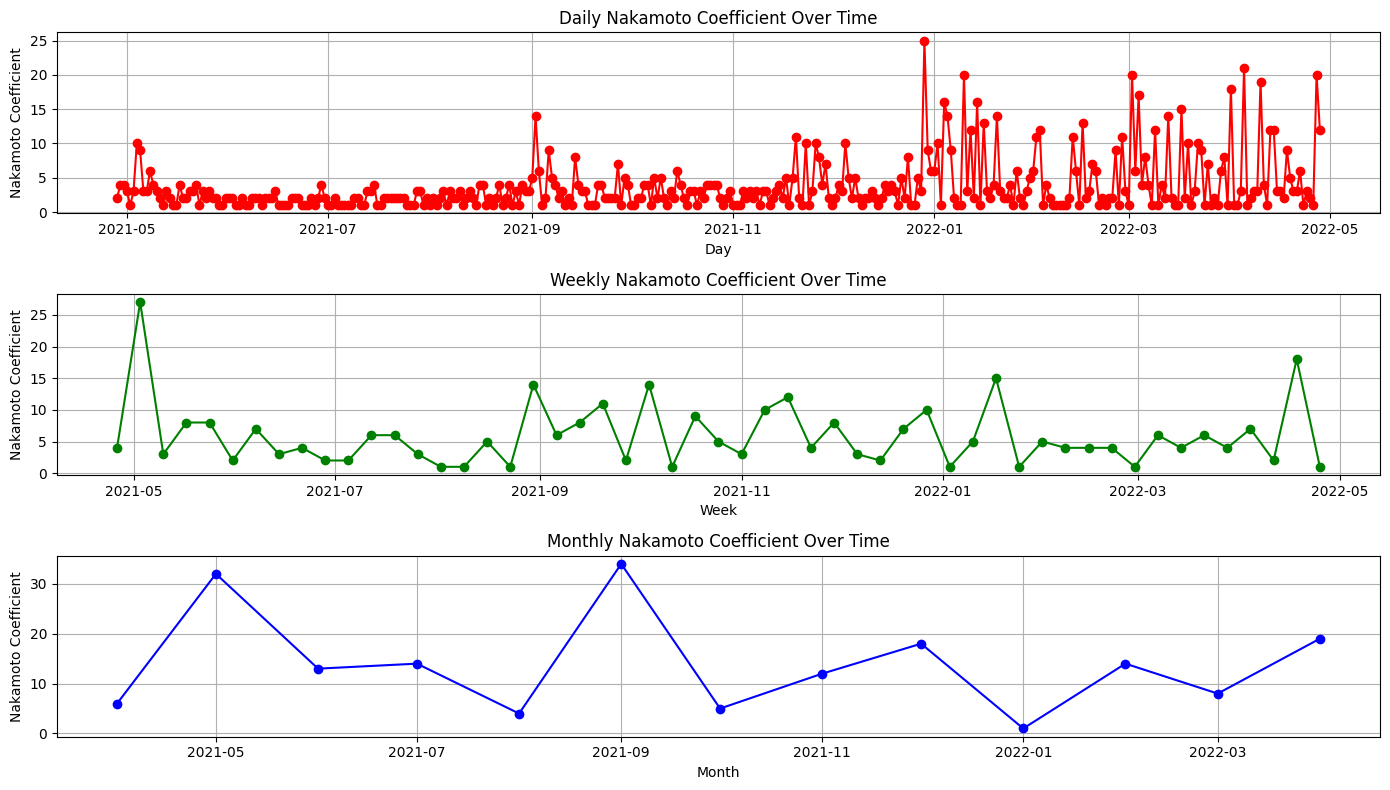

In [21]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Step 1. Loading Dataset

# Load the dataset
file_path = 'IOTA_1year_tx_data2.csv'
df = pd.read_csv(file_path)

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 2. Calculation 

# Function to safely parse the strings
def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []

# Function to calculate the Gini Coefficient
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))
    return gini

# Function to calculate the Nakamoto Coefficient
def nakamoto_coefficient(balances, threshold=0.5):
    sorted_balances = np.sort(balances)[::-1]  # Sort in descending order
    cumulative_share = np.cumsum(sorted_balances) / np.sum(sorted_balances)
    return np.searchsorted(cumulative_share, threshold) + 1

# Prepare Data: Calculate net balances for each address
def calculate_net_balances(transactions):
    address_balances = {}
    
    for _, tx in transactions.iterrows():
        input_addresses = safe_literal_eval(tx['input_addresses_x'])
        output_addresses = safe_literal_eval(tx['output_addresses_y'])
        input_amounts = safe_literal_eval(tx['input_amounts_x'])
        output_amounts = safe_literal_eval(tx['output_amounts_y'])

        for addr, amount in zip(input_addresses, input_amounts):
            if addr in address_balances:
                address_balances[addr] -= amount
            else:
                address_balances[addr] = -amount

        for addr, amount in zip(output_addresses, output_amounts):
            if addr in address_balances:
                address_balances[addr] += amount
            else:
                address_balances[addr] = amount

    return address_balances

address_balances = calculate_net_balances(df)

# Convert the address balances to a DataFrame
balances_df = pd.DataFrame(list(address_balances.items()), columns=['address', 'balance'])
balances_df = balances_df[balances_df['balance'] > 0]  # Filter out addresses with zero or negative balance

# Add the original transaction timestamps
df_balances_with_timestamps = pd.merge(balances_df, df[['timestamp']], left_index=True, right_index=True, how='left')

# Group the data by the appropriate time intervals and calculate the Nakamoto Coefficient
def calculate_nakamoto_coefficient(df, time_interval):
    df['time_group'] = df['timestamp'].dt.to_period(time_interval)
    nakamoto_df = df.groupby('time_group')['balance'].apply(nakamoto_coefficient).reset_index()
    return nakamoto_df

# Calculate the Nakamoto Coefficient for daily, weekly, and monthly intervals
daily_nakamoto = calculate_nakamoto_coefficient(df_balances_with_timestamps, 'D')
weekly_nakamoto = calculate_nakamoto_coefficient(df_balances_with_timestamps, 'W')
monthly_nakamoto = calculate_nakamoto_coefficient(df_balances_with_timestamps, 'M')

# Plot the Nakamoto Coefficient for each time interval
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_nakamoto['time_group'].dt.to_timestamp(), daily_nakamoto['balance'], marker='o', linestyle='-', color='r')
plt.title("Daily Nakamoto Coefficient Over Time")
plt.xlabel("Day")
plt.ylabel("Nakamoto Coefficient")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(weekly_nakamoto['time_group'].dt.to_timestamp(), weekly_nakamoto['balance'], marker='o', linestyle='-', color='g')
plt.title("Weekly Nakamoto Coefficient Over Time")
plt.xlabel("Week")
plt.ylabel("Nakamoto Coefficient")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(monthly_nakamoto['time_group'].dt.to_timestamp(), monthly_nakamoto['balance'], marker='o', linestyle='-', color='b')
plt.title("Monthly Nakamoto Coefficient Over Time")
plt.xlabel("Month")
plt.ylabel("Nakamoto Coefficient")
plt.grid(True)

plt.tight_layout()
plt.show()






#  Calculation and Plotting of Nakamoto Coefficient in One plot





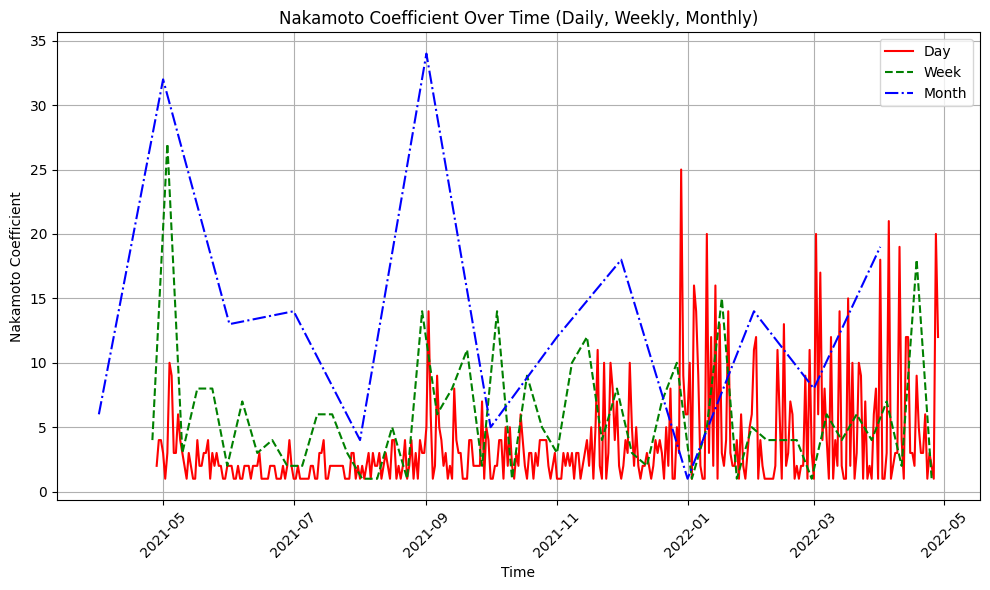

In [22]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Step 1. Loading Dataset
file_path = 'IOTA_1year_tx_data2.csv'
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 2. Calculation 

def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []

def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))
    return gini

def nakamoto_coefficient(balances, threshold=0.5):
    sorted_balances = np.sort(balances)[::-1]
    cumulative_share = np.cumsum(sorted_balances) / np.sum(sorted_balances)
    return np.searchsorted(cumulative_share, threshold) + 1

def calculate_net_balances(transactions):
    address_balances = {}
    for _, tx in transactions.iterrows():
        input_addresses = safe_literal_eval(tx['input_addresses_x'])
        output_addresses = safe_literal_eval(tx['output_addresses_y'])
        input_amounts = safe_literal_eval(tx['input_amounts_x'])
        output_amounts = safe_literal_eval(tx['output_amounts_y'])

        for addr, amount in zip(input_addresses, input_amounts):
            if addr in address_balances:
                address_balances[addr] -= amount
            else:
                address_balances[addr] = -amount

        for addr, amount in zip(output_addresses, output_amounts):
            if addr in address_balances:
                address_balances[addr] += amount
            else:
                address_balances[addr] = amount

    return address_balances

address_balances = calculate_net_balances(df)
balances_df = pd.DataFrame(list(address_balances.items()), columns=['address', 'balance'])
balances_df = balances_df[balances_df['balance'] > 0]

df_balances_with_timestamps = pd.merge(balances_df, df[['timestamp']], left_index=True, right_index=True, how='left')

def calculate_nakamoto_coefficient(df, time_interval):
    df['time_group'] = df['timestamp'].dt.to_period(time_interval)
    nakamoto_df = df.groupby('time_group')['balance'].apply(nakamoto_coefficient).reset_index()
    return nakamoto_df

# Step 3. Calculate and Plot the Combined Nakamoto Coefficient

daily_nakamoto = calculate_nakamoto_coefficient(df_balances_with_timestamps, 'D')
weekly_nakamoto = calculate_nakamoto_coefficient(df_balances_with_timestamps, 'W')
monthly_nakamoto = calculate_nakamoto_coefficient(df_balances_with_timestamps, 'M')

plt.figure(figsize=(10, 6))
plt.plot(daily_nakamoto['time_group'].dt.to_timestamp(), daily_nakamoto['balance'], linestyle='-', color='r', label='Day')
plt.plot(weekly_nakamoto['time_group'].dt.to_timestamp(), weekly_nakamoto['balance'], linestyle='--', color='g', label='Week')
plt.plot(monthly_nakamoto['time_group'].dt.to_timestamp(), monthly_nakamoto['balance'], linestyle='-.', color='b', label='Month')

plt.title("Nakamoto Coefficient Over Time (Daily, Weekly, Monthly)")
plt.xlabel("Time")
plt.ylabel("Nakamoto Coefficient")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






# Gini Coefficient Over Time (Daily, Weekly, Monthly)



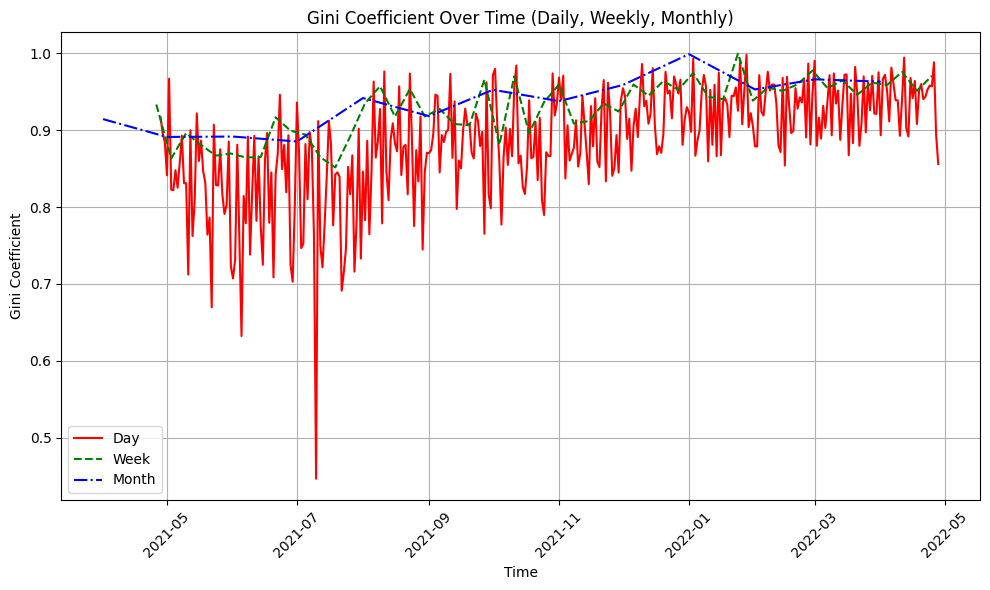

In [24]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# Step 1. Loading Dataset

file_path = 'IOTA_1year_tx_data2.csv'
df = pd.read_csv(file_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 2. Calculation 

def safe_literal_eval(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []

def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    index = np.arange(1, n + 1)
    gini = (np.sum((2 * index - n - 1) * x)) / (n * np.sum(x))
    return gini

# Prepare Data: Calculate net balances for each address
def calculate_net_balances(transactions):
    address_balances = {}
    
    for _, tx in transactions.iterrows():
        input_addresses = safe_literal_eval(tx['input_addresses_x'])
        output_addresses = safe_literal_eval(tx['output_addresses_y'])
        input_amounts = safe_literal_eval(tx['input_amounts_x'])
        output_amounts = safe_literal_eval(tx['output_amounts_y'])

        for addr, amount in zip(input_addresses, input_amounts):
            if addr in address_balances:
                address_balances[addr] -= amount
            else:
                address_balances[addr] = -amount

        for addr, amount in zip(output_addresses, output_amounts):
            if addr in address_balances:
                address_balances[addr] += amount
            else:
                address_balances[addr] = amount

    return address_balances

address_balances = calculate_net_balances(df)
balances_df = pd.DataFrame(list(address_balances.items()), columns=['address', 'balance'])
balances_df = balances_df[balances_df['balance'] > 0]  # Filter out addresses with zero or negative balance

# Add the original transaction timestamps
df_balances_with_timestamps = pd.merge(balances_df, df[['timestamp']], left_index=True, right_index=True, how='left')

# Group the data by the appropriate time intervals and calculate the Gini Coefficient
def calculate_gini_coefficient(df, time_interval):
    df['time_group'] = df['timestamp'].dt.to_period(time_interval)
    gini_df = df.groupby('time_group')['balance'].apply(gini_coefficient).reset_index()
    return gini_df

# Calculate the Gini Coefficient for daily, weekly, and monthly intervals
daily_gini = calculate_gini_coefficient(df_balances_with_timestamps, 'D')
weekly_gini = calculate_gini_coefficient(df_balances_with_timestamps, 'W')
monthly_gini = calculate_gini_coefficient(df_balances_with_timestamps, 'M')

# Plot the Gini Coefficient for each time interval
plt.figure(figsize=(10, 6))

plt.plot(daily_gini['time_group'].dt.to_timestamp(), daily_gini['balance'], linestyle='-', color='r', label='Day')
plt.plot(weekly_gini['time_group'].dt.to_timestamp(), weekly_gini['balance'], linestyle='--', color='g', label='Week')
plt.plot(monthly_gini['time_group'].dt.to_timestamp(), monthly_gini['balance'], linestyle='-.', color='b', label='Month')

plt.title("Gini Coefficient Over Time (Daily, Weekly, Monthly)")
plt.xlabel("Time")
plt.ylabel("Gini Coefficient")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



